In [51]:
# Project 6: Netflix User Behavior Analysis
# Problem Statement: Streaming services want to understand what content users prefer.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/6_Netflix.csv")
df.head()

,user_id,title,genre,watch_count,watch_hours,last_watched,rating,liked,device,age_group,viewing_history
0,U1,Forrest Gump,Drama,16,37.9,2025-03-31 10:31:25,NaN,False,smart-tv,36-45,"[{""timestamp"": ""2025-01-30 10:31"", ""duration_m..."
1,U2,The Silence of the Lambs,Thriller,19,37.4,2025-06-15 10:31:25,3.0,True,tablet,56+,"[{""timestamp"": ""2025-05-05 10:31"", ""duration_m..."
2,U3,Se7en,Thriller,15,31.8,2025-04-19 10:31:25,4.0,False,laptop,36-45,"[{""timestamp"": ""2025-03-17 10:31"", ""duration_m..."
3,U4,Inception,Sci-Fi,11,27.1,2025-06-12 10:31:25,1.0,True,mobile,36-45,"[{""timestamp"": ""2025-05-19 10:31"", ""duration_m..."
4,U5,The Godfather,Crime,10,29.2,2025-04-13 10:31:25,2.0,False,gaming-console,36-45,"[{""timestamp"": ""2025-02-16 10:31"", ""duration_m..."


In [54]:
df.shape

(500, 11)

In [55]:
df.columns

Index(['user_id', 'title', 'genre', 'watch_count', 'watch_hours',
       'last_watched', 'rating', 'liked', 'device', 'age_group',
       'viewing_history'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          500 non-null    object 
 1   title            500 non-null    object 
 2   genre            500 non-null    object 
 3   watch_count      500 non-null    int64  
 4   watch_hours      500 non-null    float64
 5   last_watched     500 non-null    object 
 6   rating           419 non-null    float64
 7   liked            500 non-null    bool   
 8   device           500 non-null    object 
 9   age_group        500 non-null    object 
 10  viewing_history  500 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 39.7+ KB


In [57]:
df.dtypes

user_id             object
title               object
genre               object
watch_count          int64
watch_hours        float64
last_watched        object
rating             float64
liked                 bool
device              object
age_group           object
viewing_history     object
dtype: object

In [58]:
df.describe()

,watch_count,watch_hours,rating
count,500.000000,500.000000,419.000000
mean,10.666000,25.364600,3.026253
std,5.800494,14.292179,1.409733
min,1.000000,2.000000,1.000000
25%,6.000000,14.075000,2.000000
50%,10.000000,24.350000,3.000000
75%,16.000000,37.400000,4.000000
max,20.000000,58.300000,5.000000


In [59]:
# check for missing values

df.isnull().sum()

user_id             0
title               0
genre               0
watch_count         0
watch_hours         0
last_watched        0
rating             81
liked               0
device              0
age_group           0
viewing_history     0
dtype: int64

In [60]:
print("Missing values before imputation:")
print(df['rating'].isnull().sum())

Missing values before imputation:
81


In [61]:
df['rating'] = df['rating'].fillna(df['rating'].median()).round().astype(int).clip(1, 5)

In [62]:
df.isnull().sum()

user_id            0
title              0
genre              0
watch_count        0
watch_hours        0
last_watched       0
rating             0
liked              0
device             0
age_group          0
viewing_history    0
dtype: int64

In [63]:
# Data Cleaning and Preparation
# Fix datetime format (your dates are in DD-MM-YYYY HH:MM:SS format)
df['last_watched'] = pd.to_datetime(df['last_watched'], format='%Y-%m-%d %H:%M:%S')

In [64]:
# Convert viewing_history from string to actual list of dictionaries
df['viewing_history'] = df['viewing_history'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

In [65]:
# Analysis 1: Top Genres
genre_counts = df['genre'].value_counts().head(10)
print("Top 10 Genres:")
print(genre_counts)

Top 10 Genres:
genre
Sci-Fi      151
Thriller    104
Drama       101
Action       99
Crime        45
Name: count, dtype: int64


In [66]:
# Analysis 2: Watch Hours per User
watch_hours_stats = df['watch_hours'].describe()
print("\nWatch Hours Statistics:")
print(watch_hours_stats)


Watch Hours Statistics:
count    500.000000
mean      25.364600
std       14.292179
min        2.000000
25%       14.075000
50%       24.350000
75%       37.400000
max       58.300000
Name: watch_hours, dtype: float64


In [67]:
# Analysis 3: Binge Behavior (users with high watch counts)
binge_threshold = df['watch_count'].quantile(0.75)  # Top 25% watch counts
binge_users = df[df['watch_count'] >= binge_threshold]
print(f"\nBinge Users (top 25% with watch_count >= {binge_threshold}):")
print(binge_users[['user_id', 'title', 'watch_count']].sort_values('watch_count', ascending=False).head(10))


Binge Users (top 25% with watch_count >= 16.0):
    user_id                     title  watch_count
28      U29           The Dark Knight           20
169    U170           The Dark Knight           20
170    U171                 Inception           20
129    U130             The Godfather           20
140    U141                The Matrix           20
97      U98        Mad Max: Fury Road           20
66      U67  The Silence of the Lambs           20
45      U46              Interstellar           20
33      U34              Interstellar           20
419    U420                The Matrix           20


In [68]:
# Analysis 4: Ratings vs Genres
avg_rating_by_genre = df.groupby('genre')['rating'].mean().sort_values(ascending=False).head(10)
print("\nAverage Rating by Genre:")
print(avg_rating_by_genre)


Average Rating by Genre:
genre
Action      3.171717
Thriller    3.057692
Sci-Fi      3.033113
Crime       2.955556
Drama       2.851485
Name: rating, dtype: float64


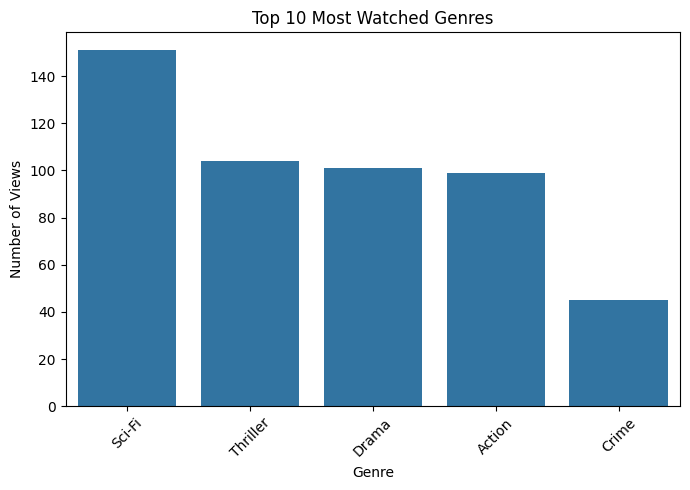

In [72]:
# Visualization 1: Top Genres
plt.figure(figsize=(7, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

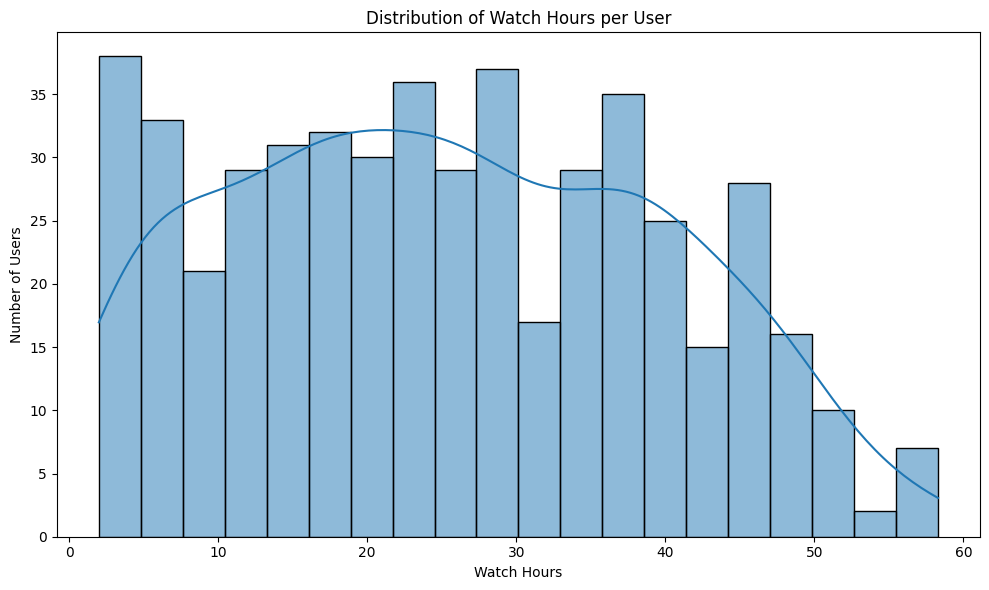

In [73]:
# Visualization 2: Watch Hours Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['watch_hours'], bins=20, kde=True)
plt.title('Distribution of Watch Hours per User')
plt.xlabel('Watch Hours')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.savefig('watch_hours_distribution.png')
plt.show()

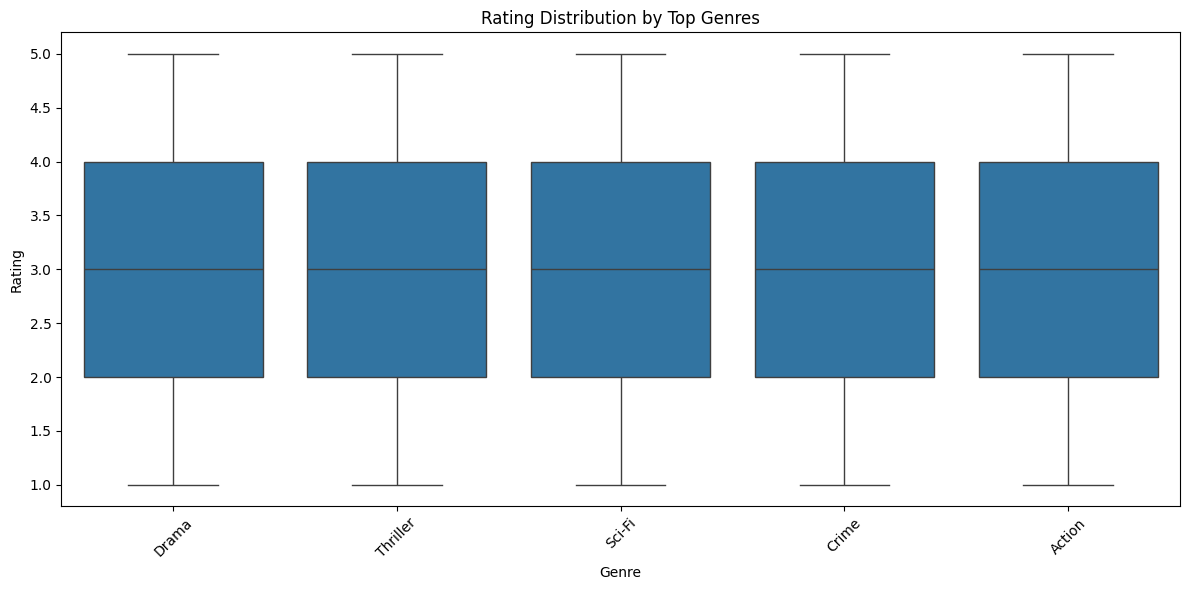

In [74]:
# Visualization 3: Ratings vs Genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='rating', data=df[df['genre'].isin(genre_counts.index[:5])])
plt.title('Rating Distribution by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ratings_by_genre.png')
plt.show()

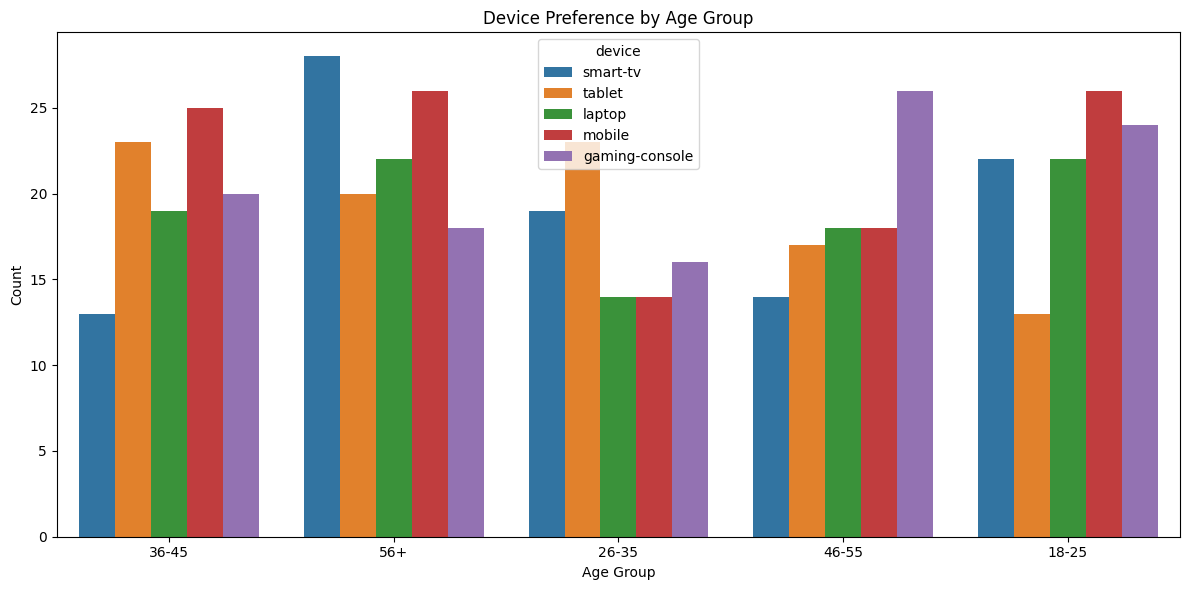

In [77]:
# Visualization 4: Device Preference by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='device', data=df)
plt.title('Device Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('device_by_age.png')
plt.show()

In [78]:
# Additional Analysis: Viewing Patterns
df['viewing_count'] = df['viewing_history'].apply(len)
avg_views_per_user = df.groupby('user_id')['viewing_count'].sum().mean()
print(f"\nAverage viewing sessions per user: {avg_views_per_user:.1f}")


Average viewing sessions per user: 3.0


In [ ]:
# Save cleaned dataset
# df.to_csv('cleaned_netflix_data.csv', index=False)